# **Explorando o Naufrágio do Titanic: Um Estudo de Ciência / Análise de Dados**

## 1. Instalação Bibliotecas

In [2]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## 2. Coleta de Dados

In [3]:
# Importando a biblioteca pandas para manipulação de dados.
import pandas as pd

# Lendo o arquivo CSV (Base Titanic.csv)
Base_Titanic = pd.read_csv(r'C:\Users\jmend\OneDrive\Documentos\Projetos\Bases Dados\Base Titanic.csv')

# Um processo de validação na qual exibo os nomes das colunas do Data Frame para verificar a estrutura do conjunto de dados.
Base_Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2.2 Organização dos Dados

In [4]:
### --> Criando novos nomes para as colunas
columns = ['id_passageiro', 'sobrevivência', 'classe_bilhete', 'nome', 'genero',
           'idade', 'irmaos_conjuges_tripulacao', 'pais_filhos_tripulacao','numero_bilhete',
           'tarifa', 'cabine', 'porto_embarque']

### --> Atribui os novos nomes de colunas ao conjunto de dados
Base_Titanic.columns = columns

### --> Capturo informações atualizadas dos dados
Base_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_passageiro               418 non-null    int64  
 1   sobrevivência               418 non-null    int64  
 2   classe_bilhete              418 non-null    int64  
 3   nome                        418 non-null    object 
 4   genero                      418 non-null    object 
 5   idade                       332 non-null    float64
 6   irmaos_conjuges_tripulacao  418 non-null    int64  
 7   pais_filhos_tripulacao      418 non-null    int64  
 8   numero_bilhete              418 non-null    object 
 9   tarifa                      417 non-null    float64
 10  cabine                      91 non-null     object 
 11  porto_embarque              418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## 2.3 Descrição dos Dados


* Atributos = 12
    * `id_passageiro` = Um identificador único para cada passageiro.
    * `sobrevivência` = Indica se o passageiro sobreviveu ou não ao naufrágio.
    * `classe_bilhete` = Classe de ticket do passageiro.
    * `nome` = Nome Completo do passageiro.
    * `genero` = Nome completo do passageiro.
    * `idade` = Idade do passageiro em anos.
    * `irmaos_conjuges_tripulacao` = Número de irmãos ou cônjuges a bordo do Titanic.
    * `pais_filhos_tripulacao` = Número de pais ou filhos a bordo do Titanic.
    * `numero_bilhete` = Número do ticket do passageiro.
    * `tarifa` = Tarifa paga pelo passageiro pela viagem.
    * `cabine` = Número da cabine do passageiro.
    * `porto_embarque` = Porto onde o passageiro embarcou.

## 2.3  Importância das Colunas

| Nome da Coluna  | Relevância | Descrição de Importância |
|-----------------|--------------|------------------|
| id_passageiro| Baixa | Apenas um identificador único, sem relação direta com a análise |
| sobrevivência| Alta (Variável Alvo) | Variável - Alvo, indicando a sobrevivência (0 ou 1)|
| classe_bilhete| Alta | Indica a classe econômica do passageiro, um forte indicador de chance de sobrevivência |
| nome | Baixa | Pode ser usado apenas para identificação  |
| genero | Alta | O gênero desempenhou um papel significativo na sobrevivência (mulheres e crianças tinham prioridades) |
| idade | Alta | A idade é um fator crítico (crianças tinha prioridades) |
| irmaos_conjuges_tripulacao | Média | Número de familiares a bordo pode influenciar a probabilidade de sobrevivência |
| pais_filhos_tripulacao | Média | Indica conexões familiares que podem impactar as chances de sobrevivência |
| numero_bilhete | Baixa | Número do ticket tem pouco significado, a menos que contenha informações ocultas |
| tarifa | Média | O valor pago pode estar relacionado ao nível de conforto e localização a bordo |
| cabine | Média | Pode fornecer insights sobre a localização da cabine, mas contém muitos valores ausentes na maioria dos conjuntos de dados |
| porto_embarque | Baixa | O porto de embarque pode ter um impacto menor na análise de sobrevivência |

## 3. Pré - Processamento

### 3.1 Tratamento de variaveis categoricas em númericas
* Transformar as colunas que tem valores categoricos (SIM E NAO OU MASCULINO E FEMININO) em 0 e 1.

    * **Por que transformar variáveis categóricas em numéricas?**
        * A transformação de variáveis categóricas em numéricas é um passo crucial no pré - processamento de dados para Machine Learning. A maioria dos algoritmos de aprendizado de máquina opera com dados numéricos, realizando cálculos matemáticos que não possíveis com texto ou categorias. Desta forma, aqui está uma listagem com as principais razões:

            * `Requisitos dos algoritmos:` Algoritmos de aprendizado supervisionado e não supervisinado, exigem entradas numéricas nos seus respectivos conjuntos de dados. Certamente, isso acontece pelo fato de realizarem operações matemáticas.

            *  `Facilita a análise estatística:` Métricas estatísticas descritivas, como média, mediana, moda e entre outras. São calculadas sobre valores numéricos. Desta forma, está conversão vai auxiliar na aplicação desses métodos.

            * `Melhora na interpretabilidade dos modelos:` A partir de uma boa conversão podemos influenciar no desempenho do modelo. Uma codificação adequada pode revelar padrões e relações que seriam ocultos de outra forma.

    * **Quais foram os resultados?**
        * Transformação da coluna `genero`: Esta coluna com os dados originais continha valores categóricos como "masculino" e "feminino", ela foi transformada em uma coluna numérica. Neste sentido, o  *LabelEncoder* atribuiu um valor numérico único para cada categoria.

In [5]:
# Importa a função do Label Encoder da biblioteca scikit - learn 
# Label - Enconder = Função utilizada para converter dados categoricos em numericos (EX: 0 e 1)
from sklearn.preprocessing import LabelEncoder

# Cria um objeto do Label Encoder
label_encoder = LabelEncoder()

# Determinamos que a transformação vai ocorrer na coluna genero
# fit_transforms = Aprende com os valores da coluna e com isso consegue transformar os valores.
Base_Titanic['genero'] = label_encoder.fit_transform(Base_Titanic['genero'])

# Demonstra os primeiros 5 valores da coluna 'genero' depois da transformação
print(Base_Titanic['genero'].head())

0    1
1    0
2    1
3    1
4    0
Name: genero, dtype: int32


### 3.2 Tratamento dos valores faltantes (**dados missing**)
* Identificação e tratamento dos valores faltantes no conjunto de dados. Portanto, lidar com valores faltantes é uma etapa crucial no pré - processamento, pois muitos algoritmos de Machine Learning não conseguem lidar diretamente com esses valores, e sua presença pode enviesar as análises futuras.

    * **Processo realizado:**
        * O primeiro passo é identificar a quantidade de valores faltantes em cada coluna do DataFrame. Para isso, utilizamos o método *.isnull().sum()* da biblioteca `Pandas`.

        * Como saída, tivemos os seguintes resultados:
            * Coluna **_idade_**: 86 valores faltantes.
            * Coluna **_tarifa_**: 1 valor faltante.
            * Coluna **_cabine_**: 327 valores faltantes.


    * **Definição Estratégias de Tratamento**
        * Com base na quantidade e na natureza dos dados faltantes em cada coluna, diferentes estratégias foram aplicadas:

            1. **idade: Imputação com Modelo de Machine Learning (Random Forest)**
            * `Justificativa:` Na coluna **idade** a remoção das linhas com valores faltantes resultaria em uma perda significativa de dados (86 registros). Desta forma, optou-se pela imputação utilizando um modelo de Machine Learning para estimae valores faltantes de forma mais precisa.

            2. **tarifa: Imputação com a Mediana**
            * `Justificativa:` Como aqui temos apenas um valor faltante na coluna tarifa. Nesse caso, a imputação pela mediana é uma solução simples e eficaz, pois não é necessário um método mais complexo para um único valor. A mediana é não é influenciada por outliers, o que é uma vantagem significativa.

            3. **cabine: Criação de uma nova categoria "Desconhecido"**
            * `Justificativa:` Um número muito alto de valores faltantes, praticamente 70% dos dados. A imputação com um modelo ou a remoção da coluna resultaria em uma perda sigificativa de informações. Neste sentido, a escolha foi criar uma nova categoria nomeada como "Desconhecido" com o objetivo de representar os valores faltantes.

In [6]:
# Contagem da quantidade de valores ausentes (nulos) em cada coluna do conjunto de dados Base_Titanic
Base_Titanic.isnull().sum()

id_passageiro                   0
sobrevivência                   0
classe_bilhete                  0
nome                            0
genero                          0
idade                          86
irmaos_conjuges_tripulacao      0
pais_filhos_tripulacao          0
numero_bilhete                  0
tarifa                          1
cabine                        327
porto_embarque                  0
dtype: int64

### 3.3 Coluna `idade`
* Vamos detalhar o desenvolvimento e a implementação do modelo Random Forest para prever as idades nos campos faltantes nessa coluna. Certamente, abrangendo a imputação dos valores faltantes, avaliação do modelo de imputação, a análise da importância das features e, crucialmente, o arredondamento dos valores imputados.



1. **Contexto:**
    * A coluna idade apresentava 86 valores faltantes. Para evitar a perda de dados e permitir o uso de algoritmos de Machine Learning que não lidam diretamente com valores nulos, optou-se pela imputação utilizando um modelo Random Forest Regressor.

---

2. **Escolha do Modelo Random Florest**
    * O modelo Random Forest foi escolhido devido à sua capacidade de modelar relações não lineares entre as variáveis, lidar com dados mistos (numéricos e catgóricos) e ser menos sensível a outliers

---

3. **Avaliação do Modelo**
    * Para avaliar o desempenho do modelo de regressão, foram calculadas as seguintes métricas:
        * **MSE (Mean Squared Error):** 42.46, indica que as previsões estão desviando cerca de 42.46 unidades do valor real.

        * **RMSE (Root Mean Squared Error):** 6.52, indica que em média as previsões erram em cerca de 6.52 anos

        * **MAE (Mean Absolute Error):** 5.06, um MAE de 5.06 indica que, em média, suas previsões erram em 5.06 anos.

        * **R(R-squared):** 0.78, esse valor é bem positivo e demonstra que o modelo explica cerca de 78% da variabilidade da idade.
        
    * Conclusão dos resultados da avaliação:
        * Podemos concluir que o modelo está fazendo um bom trabalho em prever a idade dos passageiros. Certamente, chegamos nessa conclusão por conta do 78% da variabilidade da idade pode ser explicada pelo modelo.  

---

4. **Histograma para comparação das distribuições da Idade**
    * Para verificar se a imputação distorceu a distribuição da idade, um histograma foi criado para comparar a distribuição dos valores na coluna idade antes e depois da imputação.

    * A comparação visual das distribuições foi essencial, pois a partir dela conseguimos entender que o processo de desenvolvimento do modelo foi bem feito e não introduziu vieses significativos.

---    

5. **Importância das Features para Modelo**
    * Após treinar o modelo Random Forest, foi analisado a importância de cada feature para as previsões:

    * Interpretação: O gráfico possui o objetivo de demonstrar a influência de cada variável na predição da idade. Desta forma, temos os seguintes resultados:
        * `tarifa`: Foi a variável mias importante para a predição do modelo, isso indica uma forte correlação entre o preço da passagem e a idade do passageiro.

        * `classe_bilhete`: Também teve um papel importante.

        * `irmaos_conjuges_tripulacao` e `pais_filhos_tripulacao`: Tiveram uma menor influência.

        * `genero`: Foi a variável menos relevante para a predição da idade neste modelo. Desta forma, podemos concluir que o gênero não interfere na idade dos passageiros.

---

   5. **Conclusão Final**
        * O uso do Random Forest para imputar as idades faltantes, mostrou - se uma abordagem adequada, preservando a distribuição original da variável e utilizando informações de outras features para realizar previsões mais precisas. 


In [7]:
# Importando a função RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Definindo as colunas/features que serão usadas para prever a idade
features = ['classe_bilhete', 'genero', 'tarifa', 'irmaos_conjuges_tripulacao','pais_filhos_tripulacao']

# Filtrando os dados com 'idade' preenchida e as que são nulas
Base_Titanic_com_idade = Base_Titanic[Base_Titanic['idade'].notnull()]
Base_Titanic_sem_idade = Base_Titanic[Base_Titanic['idade'].isnull()]

# Separando as features (X) e o alvo (Y) para o treinamento
x_train = Base_Titanic_com_idade[features] # Usanod as features
y_train = Base_Titanic_com_idade['idade'] # Usando a idade como alvo

# Preparando os dados de teste (onde a idade é desconhecida)
x_test = Base_Titanic_sem_idade[features]

# Criando o modelo de RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treino
rf_model.fit(x_train, y_train)

# Prevendo as idades para os passageiros que têm udade nula
predicted_ages = rf_model.predict(x_test)

# Preenchendo os valores nulos de 'idade' com as previsões
Base_Titanic.loc[Base_Titanic['idade'].isnull(), 'idade'] = predicted_ages

In [8]:
# Processo de validação para verificar se mesmo depois da aplicação do modelo, ainda existe algum valor nulo na coluna idade
Base_Titanic['idade'].isnull().sum()

0

In [9]:
# Importando métricas de avaliação.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importando biblioteca para cálculos numéricos.
import numpy as np

# Dados verdadeiros de idade (variável alvo) do conjunto de dados
y_true = Base_Titanic_com_idade['idade']

# Previsões feitas pelo modelo Random Forest para o conjunto de treinamento
y_pred = rf_model.predict(x_train)

# Calculando o MSE (Mean Squared Error) - Erro médio quadrado.
# Mede a média dos quadrados das diferenças entre os valores verdadeiros e previstos.
mse = mean_squared_error(y_true, y_pred)

# Calculando o RMSE (Root Mean Squared Error) - Raiz do erro médio quadrado.
# Fornece uma métrica na mesma escala que os dados originais.
rmse = np.sqrt(mse)

# Calculando o MAE (Mean Absolute Error) - Erro médio absoluto.
# Mede a média das diferenças absolutas entre os valores verdadeiros e previstos.
mae = mean_absolute_error(y_true, y_pred)

# Calculando o R² (R-Squared) - Coeficiente de determinação.
# Mede a proporção da variância dos dados explicada pelo modelo.
r2 = r2_score(y_true, y_pred)

# Exibindo as métricas calculadas para avaliação do modelo.

print(f"MSE: {mse}") # MSE - Quanto menor, melhor.
print(f"RMSE: {rmse}") # RMSE - Uma métrica interpetável, quanto menor, melhor.
print(f"MAE: {mae}") # MAE - Quanto menor, melhor.
print(f"R² Score: {r2}") # R² - Quanto mais próximo de 1, melhor a qualidade do ajuste.

MSE: 42.46040997562042
RMSE: 6.516165281484228
MAE: 5.05638140257463
R² Score: 0.788228387531315


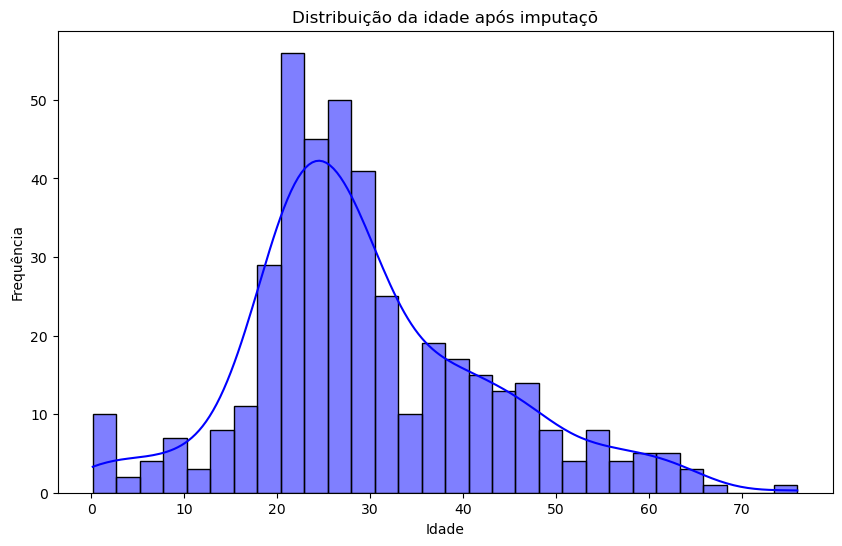

In [10]:
# Importação das bibliotecas que serão necessárias para o desenvolvimento do histograma.
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o tamanho da figura do gráfico para 10 de largura e 6 de altura
plt.figure(figsize=(10,6))

# Definição que o gráfico vai ser um histograma, com as seguintes configurações:
# - bins = 30: Divide os dados em 30 intervalos (barras).
# - kde = True: Inserir uma linha suave que representa a distribuição da idade após a imputação (densidade kernel).
# - color = blue: Define a cor do histograma como azul.
sns.histplot(Base_Titanic['idade'], bins=30, kde=True, color='blue')

#  Define o título do gráfico.
plt.title('Distribuição da idade após imputaçõ')

# Determinação do eixo x do gráfico.
plt.xlabel('Idade')

# Determinação do eixo y do gráfico
plt.ylabel('Frequência')

# Comando para exibir o gráfico desenvolvido.
plt.show()

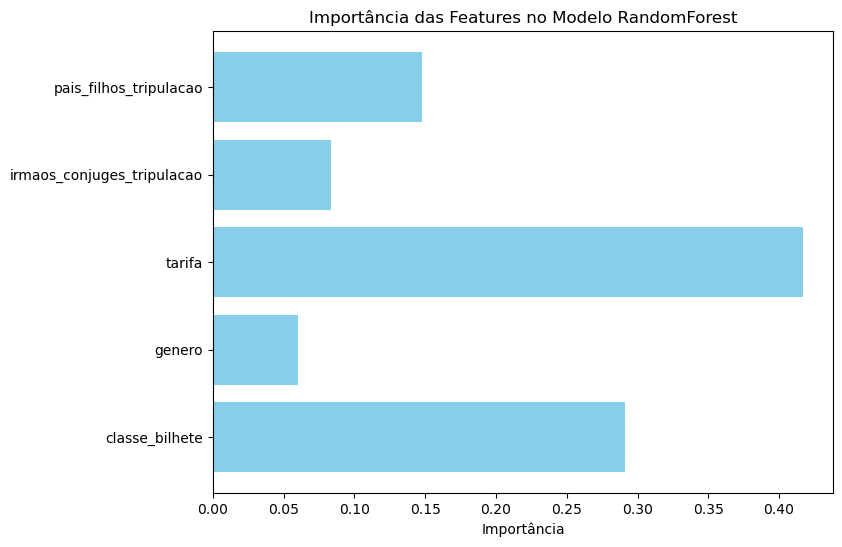

In [11]:
importances = rf_model.feature_importances_

plt.figure(figsize =(8, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo RandomForest')
plt.show()

In [12]:
print(Base_Titanic['idade'])

0      34.500000
1      47.000000
2      62.000000
3      27.000000
4      22.000000
         ...    
413    26.352706
414    39.000000
415    38.500000
416    26.352706
417    21.230333
Name: idade, Length: 418, dtype: float64


In [13]:
Base_Titanic['idade'] = Base_Titanic['idade'].round().astype(int)

print(Base_Titanic['idade'])

0      34
1      47
2      62
3      27
4      22
       ..
413    26
414    39
415    38
416    26
417    21
Name: idade, Length: 418, dtype: int32


### 3.4 Tratamento valor faltante na coluna `tarifa`.

* Esta seção detalha o processo de tratamento do valor faltante na coluna `tarifa` do dataset do Titanic. Certamente, é importante ressaltar que foi identificado a ausência de um único valor nesta coluna.

---

**Justificativa para a imputação atráves da Mediana**
A escolha da mediana pra realizar a imputação se justifica pelas seguintes motivos:

* Presença de Apenas um Valor Faltante:
    * A coluna `tarifa` possui apenas um valor ausente. Desta forma, métodos de imputação mais complexos, como modelos de ML e entre outros, seriam desnecessários e inviaveis para tratar um único valor faltante.

* Robustez a Outliers:
    * A mediana é uma medida estatística que não é influenciada por outliers. Considerando que a tarifa é uma variável que pode conter valores discrepantes (passageiros que pagaram muito mais ou muito menos do que a maioria), a mediana se torna uma escolha adequada para representar o valor típico da tarifa. sem que um único valor discrepante influencie a imputação.

---

**Resultados**
* Após a execução, o único valor faltante que estava localizado na linha 266 foi substituído pela mediana das tarifas dos demais passageiros. Portanto, se torna importante mencionar que foi criado uma variável *tarifa_mediana* para armazenar o valor da mediana.



In [14]:
# Importando biblioteca numpy, que vai facilitar no cálculo da mediana.
import numpy as np

# Identificando a linha que possui 0 como valor e substituir esses valor por NaN.
Base_Titanic['tarifa'].replace(0, np.nan, inplace=True)


C:\Users\jmend\AppData\Local\Temp\ipykernel_44004\350983583.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Titanic['tarifa'].replace(0, np.nan, inplace=True)


In [15]:
# Criação a variável *tarifa_mediana* e nela vamos armazenar o valor da mediana da coluna tarifa
tarifa_mediana = Base_Titanic['tarifa'].median()

# Imputando o valor faltante com a mediana.
Base_Titanic['tarifa'].fillna(tarifa_mediana, inplace=True)

C:\Users\jmend\AppData\Local\Temp\ipykernel_44004\513519797.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Titanic['tarifa'].fillna(tarifa_mediana, inplace=True)


In [16]:
# Validando se na linha 266 o valor foi imputado corretamente.
Base_Titanic.iloc[266]

id_passageiro                                                  1158
sobrevivência                                                     0
classe_bilhete                                                    1
nome                          Chisholm, Mr. Roderick Robert Crispin
genero                                                            1
idade                                                            46
irmaos_conjuges_tripulacao                                        0
pais_filhos_tripulacao                                            0
numero_bilhete                                               112051
tarifa                                                      14.4542
cabine                                                          NaN
porto_embarque                                                    S
Name: 266, dtype: object

### 3.5 Tratamento de Valores Faltantes na Coluna **Cabine**

Esta seção descreve o tratamento que foi realizados dos valores faltantes na coluna `cabine` do dataset. Essa coluna continha a maior parte dos dados ausentes, ea estratégia adotada visou presetvar ao máximo a informação disponível, criando uma nova variável categórica chamada `deck`e imputando a categoria "Desconhecido" para os valores faltantes.

---

**Justificativa para criação da variável `deck` e imputação da categoria Desconhecido**

A coluna `cabine` apresentava um número significativo de valores faltantes (327). A remoção desses valores acarretaria em uma perda significativa de informações potencialmente relevante. Importante salientar, que a imputação direta dos valores faltantes com técnicas como média ou moda não seria apropriada, pois a informação contida na variável `cabine` é categórica e não numérica.

---

**Estratégia Adotada**

A estratégia adotada, consistiu em duas etapas:
 * **Extração da informação do `deck`:** A extração da informação do deck permite aproveitar ao máximo os dados conhecidos, criando uma nova variável que pode ser relevante para a análise.

 * **Tratamento adequado de dados categóricos:** A imputação da categoria "Desconhecido" é uma forma apropriada de lidar com valores faltantes em variáveis categóricas, sem introduzir viés numérico ou ordem artificial.

---

 **Essa estratégia se justifica por:**

 * **Preservação da informação:** A extração da informação do deck permite aproveitar ao máximo os dados conhecidos, criando uma nova variável que pode ser relevante para futuras análises.

 * **Tratamento adequado de dados categóricos:** A imputação da categoria "Desconhecido" é uma forma apropriada de lidar com valores faltantes em variáveis categóricas, sem introduzir viés numérico.


 ---

 **Resultados**
 Após a execução do código, a coluna `cabine` é removida do conjunto de dados. Desta forma, a coluna `deck`, é criada, contendo a letra de cada deck para os valores conhecidos e a o valor "Desconhecido" para os valores ausentes

In [17]:
# Extração da primeira letra da coluna 'cabine' e cria uma nova coluna 'deck' com esses valores. 
Base_Titanic['deck'] = Base_Titanic['cabine'].str[0]

# Substituição dos valores nulos por 'Desconhecido'
Base_Titanic['deck'].fillna('Desconhecido', inplace=True)

# Convertendo a coluna 'deck' para o tipo categórico para otimizar o armazenamento.
Base_Titanic ['deck'] = Base_Titanic['deck'].astype('category')

C:\Users\jmend\AppData\Local\Temp\ipykernel_44004\752467270.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Base_Titanic['deck'].fillna('Desconhecido', inplace=True)


In [18]:
# Validação das colunas presentes no conjunto de dados, pra verificar se coluna deck foi criada com sucesso.
Base_Titanic.columns

Index(['id_passageiro', 'sobrevivência', 'classe_bilhete', 'nome', 'genero',
       'idade', 'irmaos_conjuges_tripulacao', 'pais_filhos_tripulacao',
       'numero_bilhete', 'tarifa', 'cabine', 'porto_embarque', 'deck'],
      dtype='object')

In [19]:
# Dropando a coluna 'cabine'.
Base_Titanic.drop(columns=['cabine'], inplace=True)

# Validando se a coluna foi dropada.
Base_Titanic.columns

Index(['id_passageiro', 'sobrevivência', 'classe_bilhete', 'nome', 'genero',
       'idade', 'irmaos_conjuges_tripulacao', 'pais_filhos_tripulacao',
       'numero_bilhete', 'tarifa', 'porto_embarque', 'deck'],
      dtype='object')

In [20]:
Base_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id_passageiro               418 non-null    int64   
 1   sobrevivência               418 non-null    int64   
 2   classe_bilhete              418 non-null    int64   
 3   nome                        418 non-null    object  
 4   genero                      418 non-null    int32   
 5   idade                       418 non-null    int32   
 6   irmaos_conjuges_tripulacao  418 non-null    int64   
 7   pais_filhos_tripulacao      418 non-null    int64   
 8   numero_bilhete              418 non-null    object  
 9   tarifa                      418 non-null    float64 
 10  porto_embarque              418 non-null    object  
 11  deck                        418 non-null    category
dtypes: category(1), float64(1), int32(2), int64(5), object(3)
memory usage: 33.5+ 

## 3.3 Engenharia de Atributos (Criação da Feature _tamanhofamilia_)

### Entendendo a Engenharia de Features
 A engenharia de features é um processo fundamental em Ciência de Dados, onde se criam novas variáveis a partir das já existentes no conjunto de dados que está sendo trabalhado. Desta forma, isso acontece com o objetivo de capturar informações mais relevantes ou criar representações mais adequadas para os modelos de Machine Learning.

---

### Por que criar essa feature?
* `Relevância para a sobrevivência`: É possível que passageiros viajando em grupos maiores tenham tido prioridades diferentes nos procedimentos de salvamento.

* `Simplificação do modelo`: Ao invés de utilizar duas features separadas (irmãos/cônjuges e pais/filhos), uma única feature "tamanho da familia" pode capturar a mesma informação de forma mais concisa.

---

### Utilização da nova feature:
A feature criada pode ser utilizada em modelos de machine learning para prever a sobrevivência dos passageiros. Por exemplo, podemos incluir essa feature em um modelo de regressão logística para verificar se o tamanho da família é um fator significativo para a sobrevivência.

---

### Analisando a nova feature "tamanho_familia":
A partir de um resumo estatístico com a utilização do código *Base_Titanic['tamanho_familia'].describe()* temos os seguintes resultados:
* count    418.000000
* mean       1.839713
* std        1.519072
* min        1.000000
* 25%        1.000000
* 50%        1.000000
* 75%        2.000000
* max       11.000000

Certamente, a partir desses valores podemos concluir que a maioria das pessoas viajava sozinhas ou com poucas pessoas, mas havia apenas algumas famílias grandes. O fato da mediana ser igual a 1 reforça essa ideia de que a maioria das pessoas viajava sozinha.


In [21]:
# Criando uma nova coluna denominada como "tamanho_familia"
    # Somando todos os membreos das famílias a bordo. Desta forma, soma-se os valores da variavel "irmaos_conjuges_tripulacao" e "pais_filhos_tripulacao". 


Base_Titanic ['tamanho_familia'] = Base_Titanic['irmaos_conjuges_tripulacao'] + Base_Titanic['pais_filhos_tripulacao'] + 1

In [22]:
# Criando um resumo estatistico referente a variavel que acabou de ser criada.
Base_Titanic['tamanho_familia'].describe()

count    418.000000
mean       1.839713
std        1.519072
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: tamanho_familia, dtype: float64

## 4. **Análise Univariada**

A análise univariada é fundamental para entender as distruibuições e proporções que estão presentes em cada variável do conjunto. Ela nos permite identificar padrões, outliers e caractrística únicas de cada atributo.

---

**Análises Univariadas que vão ser realizadas:**
### 1. Numéricas:
* Distribuição das idades dos passageiros (Antes e Depois da imputação).
* Distribuição das tarifas pagas.
* Distribuição do tamanho das familias.

### 2. Categóricas:
* Identificar a proporção de sobreviventes e não sobreviventes
* Distribuição dos passageiros por classe.
* Proporção de homens e mulheres.
* Distribuição dos passageiros por porto de embarque.
* Distribuição dos passageiros por deck.

---

### **4.2 Análise de Distribuição da Idade**

**Introdução:**

A análise da variável *idade* no dataset do Titanic é fundamental para entendermos a composição da idade na população a bordo do navio. Aqui iremos demonstrar os resultados dessa análise univariada da idade, incluindo a comparação da distruibuição antes e depois da imputação dos valores faltantes.

---

**Visualização Utilizada:**
* **Histograma:** Foi criado um histograma para visualizar a distribuição da idade antes e depois da imputação.

* **Comparação:** As duas distribuições foram comparadas visualmente para verificar se a imputação alterou significativamento a forma da distribuição.

---

**Resultados:**

A análise da distribuição dos valores da idade nos revelou os seguintes resultados:

* **Distribuição:** A distribuição da idade apresenta uma forma assimétrica à direita, com uma cauda longa para valores mais altos. Isso indica que a maioria dos passageiros era jove,, com uma concentração na faixa dos 20 a 30 anos.

* **Impacto da Imputação:** A comparação entre os histogramas antes e depois da imputação mostrou que a aplicação do modelo RandomFlorest não alterou significativamente a forma geral da distribuição. Os valores imputados se encaixam bem na distribuição original, sugerindo que o método de imputação utilizado foi eficaz e não apresentou nenhum viés para o conjunto de dados.

---

**Conclusões**

A análise da variável idade nos permitiu concluir que:
* A maioria dos passageiros do Titanic era jovem.

* A imputação dos valores faltantes não distorceu significativamente a distribuição da idade.

* A idade é uma variável importante para a análise da sobrevivência, pois pode estar relacionada com fatores como a prioridade no resgate.

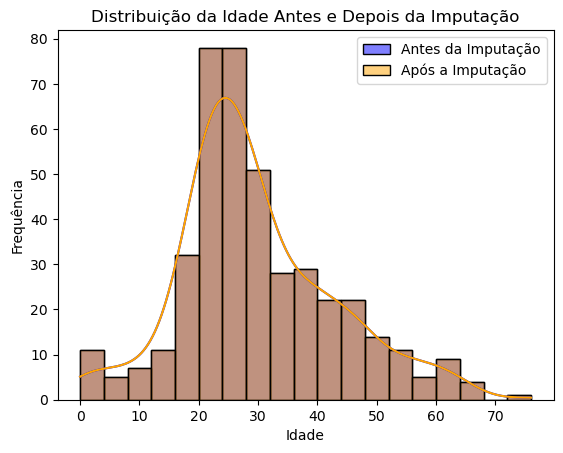

In [23]:
# Importando as bibliotecas necessárias para criar visualizações atrativas e eficientes.
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma da idade antes da imputação (apenas para os dados completos)
sns.histplot(data=Base_Titanic[Base_Titanic['idade'].notnull()], x='idade', kde=True, color='blue', label='Antes da Imputação')

# Histograma da idade após a imputação
sns.histplot(data=Base_Titanic, x='idade', kde=True, color='orange', label='Após a Imputação')

# Titulo do Gráfico
plt.title('Distribuição da Idade Antes e Depois da Imputação')

# Definição do eixo X
plt.xlabel('Idade')

# Definição do eixo y
plt.ylabel('Frequência')

# Acrescentar uma legenda pro gráfico
plt.legend()

# Demonstra o gráfico 
plt.show()

### **4.2 Análise Univariada _Tarifa_**

**Introdução**

A análise da distribuição das tarifas pagas é crucial para entendermos a variação nos valores pagos pelos passageiros e como essa variável pode estar relacionada com outras características, como a classe social e a sobrevivência.

---

**Visualizações Utilizadas**
* Histograma = Utilizado para entender como os valores estão distribuidos na variável e qual o seu comportamento.

* Box Plot = Utilizado para identificar medidas de têndencias centrais (mediana e quartil) e entendermos os tais valores discrepantes que estão presentes no conjunto (outliers).

---

**Resultados (Distribuição)**

A análise da distribuição dos valores da tarifa nos revelou os seguintes resultados:

* `Tarifas Baixas:` O histograma apresentou uma assimetrica de valores à direita, isso indica que a maioria dos passageiros pagou tarifas relativamente baixas e com isso teve poucos passageiros que pagaram valores muitos altos. Desta forma, isso demonstra uma desigualdade social a bordo do navio.

* `Concentração em valores baixos:` A maior parte da frequência se concentra nos valores mais baixo, indicando que a maioria dos passageiros viajou em classes inferiores.

**Resultados (Outliers)**
* `Presença de muitos outliers:` O boxplot confirma a presença de vários valores discrepantes. Esses outliers correspondem a tarifas muito altas, indicando a existência de passageiros que adquiriram serviços e acomodações de luxo.

* `Variabilidade:` A altura da caixa indica uma grande variabilidade nos valores das tarifas, o que reforça a ideia de que a tarifa era um fator que diferenciava significativamente os passageiros.

---

**Conclusão**

Ao combinar essas informações, podemos concluir que:
* `Desigualdade Social:` A distruibuição das tarifas reflete a desigualdade social a bordo do titanic, com uma minoria de passageiros pagando valores muito superiores à media.

* `Segmentação de mercado:` A grande variação nas tarifas sugere que a companhia marítima oferecia diferentes tipos de serviços e acomodações para atender a diferentes segmentos de clientes.

* `Impacto na sobrevivência:` É provável que a tarifa tenha influenciado a probabilidade de sobrevivência, já que passageiros que pagaram tarifas mais altas podem ter sido acesso a recursos e informações que aumentaram suas chances de ser resgatados.

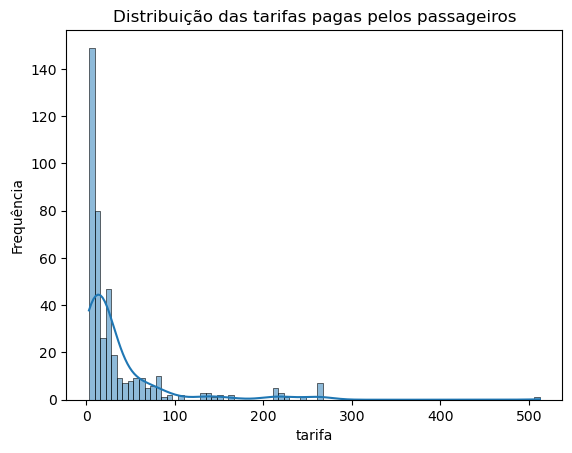

In [24]:
sns.histplot(data=Base_Titanic, x='tarifa', kde=True)
plt.title('Distribuição das tarifas pagas pelos passageiros')
plt.xlabel('tarifa')
plt.ylabel('Frequência')
plt.show()

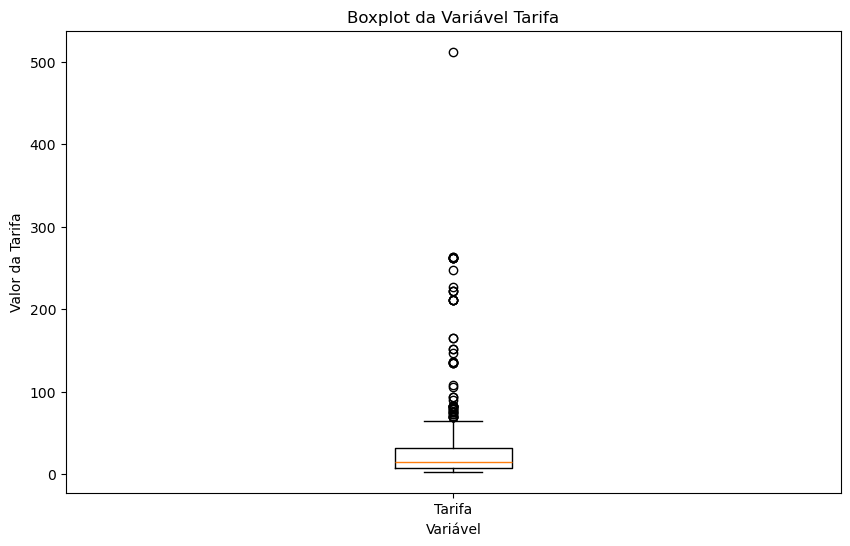

In [25]:
plt.figure(figsize=(10, 6))
plt.boxplot(Base_Titanic['tarifa'].dropna(), labels=['Tarifa'])  # dropna() remove valores nulos
plt.title('Boxplot da Variável Tarifa')
plt.xlabel('Variável')
plt.ylabel('Valor da Tarifa')
plt.show()

### **4.2 Análise Univariada _Tamanhodasfamilias_**

**Introdução**

A análise da distribuição do tamanho das familias a bordo do titanic nos permite entender como os passageiros: viajavam sozinhos, em pequenos grupos ou em grandes famílias. Essa informação pode ser relevante para entender a dinâmica social a bordo do navio e como isso pode ter influenciado a taxa de sobrevivência.

---

**Visualizações Utilizadas**
* Histograma = Utilizado para entender como os valores estão distribuidos na variável e qual o seu comportamento.

---

**Resultados**
* `Maioria de famílias pequenas:` A grande maioria dos passagerios viajava sozinhos ou com apenas um acompanhante. Isso é evidenciado pela alta freqência de famílias com 1 ou 2 membros.

* `Presença de pequenos grupos:` A presença de uma cauda longa à direita indica que havia algumas famílias grandes, com mais de 5 membros. Isso sugere a presença de alguns grupos familiarias maiores a bordo.

* `Distribuição concentrada:` Pelo fato da distribuição ser assimétrica positiva é um indicio que os valores estão concentrando em um lado da distribuição com valores muitos altos
 


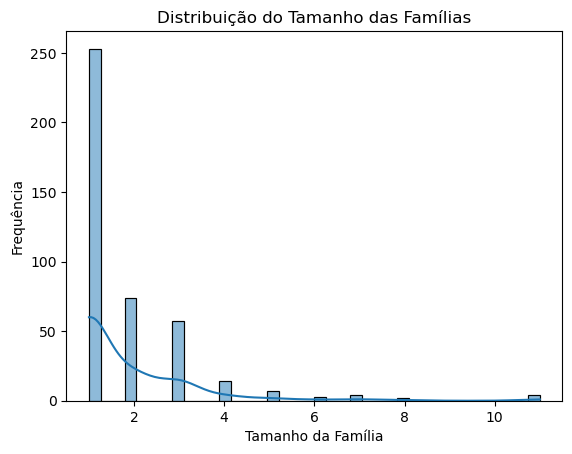

In [26]:
sns.histplot(data=Base_Titanic, x='tamanho_familia', kde=True)
plt.title('Distribuição do Tamanho das Famílias')
plt.xlabel('Tamanho da Família')
plt.ylabel('Frequência')
plt.show()

---

### **4.2 Análise Univariada _Gêneros_**

**Introdução**

A análise da proporção de homens e mulheres a bordo do Titanic é fundamental para entendermos a composição da população e como o gênero pode ter influenciado a taxa de sobrevivência.

---

**Visualização**

* `Gráfico de Barras`= Neste caso, cada barra representará um gênero (Homem ou Mulher) e a altura da barra representa a quantidade de indivíduos de cada gênero.

---

**Resultados**

* `Desbalanceamento:` É evidente um desbalanceamento entre a quantiade de homens e mulheres a bordo do navio. O número de mulheres é significativa menor do que o número de homens.

* `Dominância Masculina:` A maioria dos passageiros do Titanic era do sexo masculino. Isso pode indicar que os homens eram mais propensos a embarcar em viagens transatlânticas, possilvemente por motivos de trabalho ou negócios.

* `Influência na taxa de sobrevivência:` A maior proporção de homens pode ter influenciado a taxa de sobrevivência. É possível que as mulheres tenham tido prioridade nos procedimentos de resgate.

---

**Conclusão**

A análise da distribuição por gênero revela um desequilibrio significativo entre homens e mulheres a bordo do Titanic. Essa informação é fundamental para entendermos o contexto histórico e social da época. Neste sentido, em resumo a análise do gênero nos permite:

* **Entender a composição da população a bordo do navio**
* **Identificar possíveis vieses na coleta de dados**

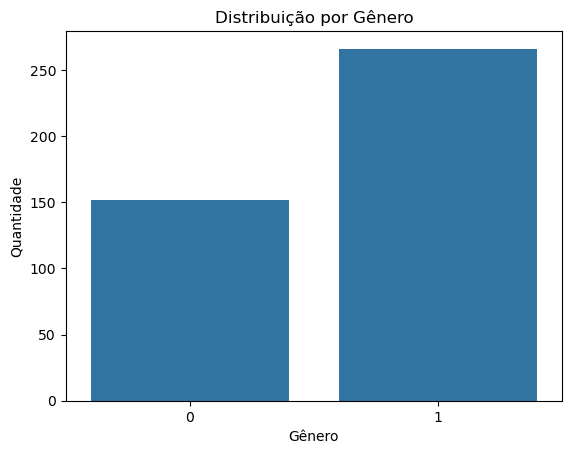

In [27]:
contagem_generos = Base_Titanic['genero'].value_counts()

sns.countplot(x='genero', data=Base_Titanic)
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

---

## 5. **Análise Bivariada**

A análise univariada nos forneceu um bom entendimento de cada variável individualmente. Agora, vamos explorar as relações entre as variáveis, o que nos permitirá identificar padrões mais complexos.

**Quais variáveis analisar?**

Considerando as variáveis que já exploradas (idade, tarifa, tamanho da família, gênero) e o contexto do Titanic, algumas combinações promissoras para análise bivariada são:

* `Sobrevivência x Gênero:` 
    * A relação entre o gênero e a sobrevivência é uma das mais importantes a ser investigada.

* `Sobrevivência x Classe:` 
    * Verificar se a classe social influenciou a chance de sobrevivência.

* `Sobrevivência x Idade:` 
    *  Analisar se a idade foi um fator determinante na sobrevivência.

* `Sobrevivência x Tarifa:` 
    *  Verificar se o valor da passagem influenciou a chance de sobreviver.

* `Sobrevivência x Tamanho da Família:` 
    * Analisar se o tamanho da família influenciou a sobrevivência.

* `Classe x Tarifa:` 
    * Verificar se existe uma relação direta entre a classe social e o valor da tarifa.

* `Idade x Gênero:` 
    * Analisar se a distribuição de idade varia entre homens e mulheres.

* `Tamanho da Família x Classe:` 
    * Verificar se o tamanho da família varia entre as diferentes classes sociais.

### **5.1 Análise Bivariada _Sobrevivência x Gênero_**

**Objetivo**

Analisar se o gênero dos passageiros influenciou a probabilidade de sobrevivência no naufrágio do Titanic.

---

**Metodologia**

* `Visualização`: Foi utilizado um gráfico de barras para comparar a quantidade de sobreviventes e não sobreviventes por gênero.

---

**Resultados**

As mulheres apresentaram uma taxa de sobrevivência significativamente maior do que os homens. Essa diferença pode ser explicada por protocolos de emergência que priorizavam mulheres e crianças, be como pelas convençoes sociais da época.

---

**Conclusões**

Certamente, o gênero foi um fator determinante na probabilidade de sobrevivência no naufrágio do Titanic. As mulheres, em geral, tiveram mais chances de sobreviver do que os homens. Neste sentido, acredito que temos dois aspectos que devemos levar em consideração.

* A análise realizada demonstra a importância de considerar o gênero como uma variável relevante na análise da sobrevivência no Titanic.3

* A diferença na taxa de sobrevivência entre homens e mulheres reflete as desigualdades sociais e as normas culturais da época.

In [28]:
contingency_table = pd.crosstab(Base_Titanic['genero'], Base_Titanic['sobrevivência'], normalize='index')
print(contingency_table)

sobrevivência    0    1
genero                 
0              0.0  1.0
1              1.0  0.0


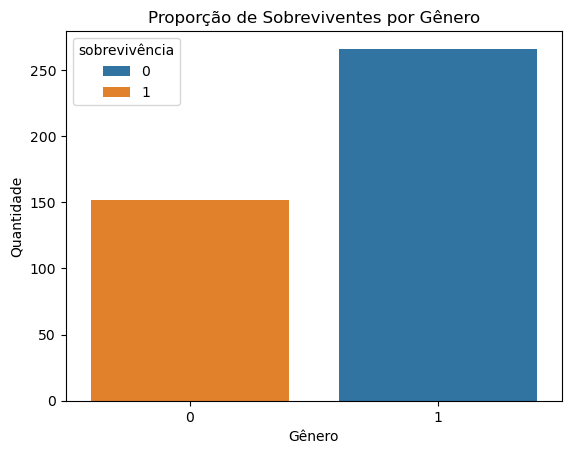

In [29]:
sns.countplot(x='genero', hue='sobrevivência', data=Base_Titanic)
plt.title('Proporção de Sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

### **5.2 Análise Bivariada _Sobrevivência x Classe_**

**Introdução**

A análise da relação entre a classe social e a sobrevivência no naufrágio do Titanic é fundamental para compreendermos como as diferentes classes sociais foram afetadas pelo desastre. A classe social, pode ter influenciado o acesso a recursos, informações e locais seguros no navio, impactando diretamente as chances de sobrevivência.

---

**Metodologia**

Para analisar essa correlação, foram utilizadas as seguintes técnicas:

* `Tabela de contigência:` Ela seria uma tabela que tem o objetivo de analisar a relação entre duas ou mais variáveis qualitativas, ajudando a identificar padrões, associações e independências estatísticas. Neste caso, a tabela vai demonstrar a proporção de sobreviventes em cada classe.

* `Gráfico de barras empilhadas:` Utilizamos um gráfico de barras empilhadas para visualizar a distribuição da sobrevivência por classe de forma mais intuitiva. Cada barra representa uma classe, e as cores representam a proporção de sobreviventes e não sobreviventes.

---

**Resultados (Tabela Contigência)**

* `Primeira Classe:` Aproximadamente 47% dos passageiros da primeira classe sobreviveram, enquanto 53% não sobreviveram.

* `Segunda Classe:` A taxa de sobrevivência na segunda classe foi significativamente menor, com apenas 32% dos passageiros sobrevivendo.

* `Terceira Classe:`A taxa de sobrevivência na terceira classe foi ainda menor, com cerca de 33% dos passageiros sobrevivendo.


**Resultados (Gráfico de Barras Empilhadas)**

O gráfico de barras reforça os resultados da tabela de contingência. As barras representam as diferentes classes, e as cores representam a proporção de sobreviventes e não sobreviventes em cada classe. É possível observar visualmente que a proporção de sobreviventes é muito maior na primeira classe e menor na terceira classe.

---

**Conclusões**

* `Desigualdade Social:` A análise demonstra claramente a desigualdade social presente no naufrágio do Titanic. Passageiros de classes sociais mais altas tiveram acesso a recursos e oportunidadades que aumentaram suas chances de sobrevivência 

* `Priorização dos Ricos:` É provável que os protocolos de emergência tenham priorizado os passageiros de primeira classe, garantindo a eles melhores chances de resgate.

* `Fatores Influenciadores:` A classe social pode ter influenciado a localização das cabines, o acesso a informações sobre o perigo e a prioridade no embarque nos botes salva-vidas.





In [30]:
tabela_contingencia = pd.crosstab(Base_Titanic['classe_bilhete'], Base_Titanic['sobrevivência'], normalize='index')
print(tabela_contingencia)

sobrevivência          0         1
classe_bilhete                    
1               0.532710  0.467290
2               0.677419  0.322581
3               0.669725  0.330275


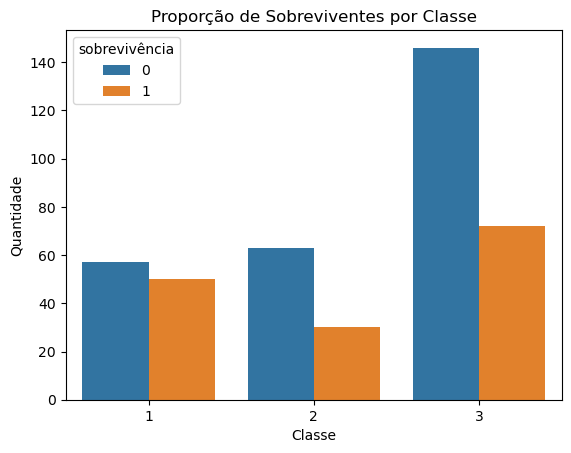

In [31]:
sns.countplot(x='classe_bilhete', hue='sobrevivência', data=Base_Titanic)
plt.title('Proporção de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

### **5.3 Análise Bivariada _Sobrevivência x Idade_**

**Objetivo**

Analisar se a idade dos passageiros influenciou a probabilidade de sobrevivência no naufrágio do Titanic.

---

**Metodologia**

* Visualização: Foi utilizado um boxplot para comparar a distribuição da idade entre sobreviventes e não sobreviventes.

---

**Resultados**

A análise do boxplot sugere que a idade pode ter sido um fator que influenciou a sobrevivência. Neste sentido, tivemos seguintes resultados:

* `Mediana:` A mediana da idade para os sobreviventes é ligeiramente superior à dos não sobreviventes, indicando que os sobreviventes tendiam a ser um pouco mais jovens.

* `Dispersão:` A dispersão dos dados é similar entre os dois grupos, sugerindo que a variabilidadeda idade é semelhante para sobreviventes e não sobreviventes.

* `Outliers:` Há alguns outliers, principalmente em idades mais avançadas, tanto entre os sobreviventes quanto entre os não sobreviventes. Esses outliers podem representar casos especiais, como crianças muito jovens ou pessoas idosas com condições de saúde que influenciaram suas chances de sobrevivência.

---

**Conclusões**

Com base bessa análise, podemos concluir que:
* `Crianças e jovens adultos:` A mediana da idade ligeiramente mais alta entre os sobreviventes sugere que crianças e jovens adultos tiveram uma maior probabilidade de sobreviver. Isso pode ser explicado por políticas de resgate que priorizavam mulheres e crianças.

* `Influência da idade:` A idade parece ter sido um fator que influenciou a sobrevivência, embora a diferença entre os grupos não seja muito grande.

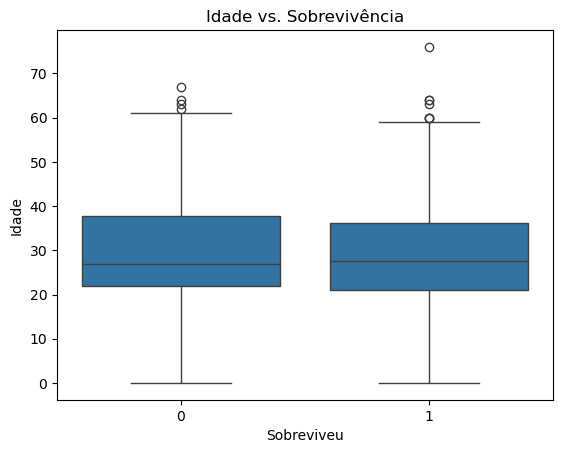

In [32]:
# Boxplot para comparar a idade entre sobreviventes e não sobreviventes
sns.boxplot(x='sobrevivência', y='idade', data=Base_Titanic)
plt.title('Idade vs. Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')
plt.show()


### **5.4 Análise Bivariada _Sobrevivência x Tarifa_**

**Introdução**

Esta análise é fundamental para entendermos como o valor da passagem influenciou as chances de um passageiro ser resgatado. O gráfico boxplot e o de densidade, oferece uma visão mais completa da distribuição da tarifa entre os sobreviventes e não sobreviventes.

---


**Metodologia**

* Box Plot: Foi utilizado um boxplot para comparar a distribuição da tarifa entre os sobreviventes e não sobreviventes.

* Gráfico Densidade: Este gráfico nos permite visualizar a distribuição da tarifa para os sobreviventes e não sobreviventes de forma mais suave e contínua.

---

**Resultados**

* `Dispersão:` A dispersão dos dados é maior entre os sobreviventes, indicando uma maior variabilidade nas tarifas pagas por esse grupo.

* `Mediana:` A mediana da tarifa para os sobreviventes é ligeiramente superior em relação ao outro grupo, e isso sugere que os passageiros que sobreviveram pagaram tarifas mais altas.

* `Outliers:`A presença de outliers, principalmente em valores mais altos, indica que alguns passageiros pagaram tarifas extremamente altas e sobreviveram.

---

**Conclusões**

* `Tarifa como indicador:` Passagerios que pagaram tarifas mais altas, geralmente ocupando cabines de primeira classe, tinham maior probabilidade de sobreviver.

* `Acesso a recursos:` A tarifa pode ser um fator determinante para o acesso a recursos e informações como localização da cabine, ordem de embarque nos botes salva - vidas e acesso a coletes salva - vidas.

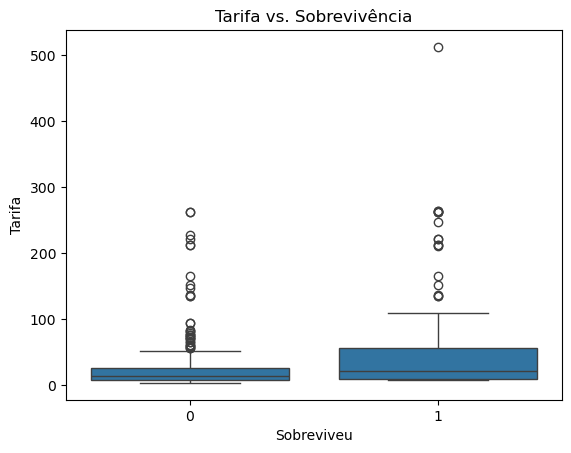

In [33]:
# Boxplot para comparar a tarifa entre sobreviventes e não sobreviventes
sns.boxplot(x='sobrevivência', y='tarifa', data=Base_Titanic)
plt.title('Tarifa vs. Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.show()


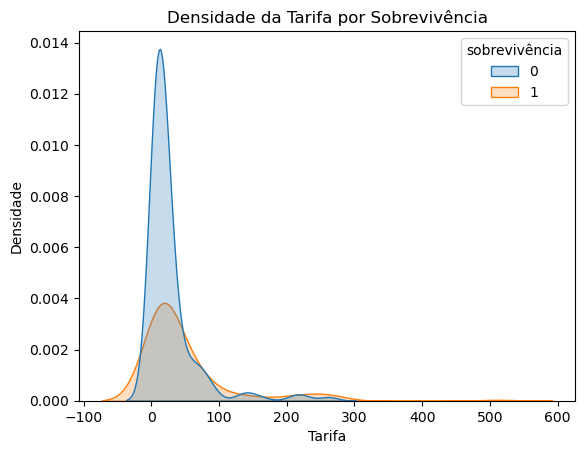

In [36]:

sns.kdeplot(data=Base_Titanic, x='tarifa', hue='sobrevivência', fill=True)
plt.title('Densidade da Tarifa por Sobrevivência')
plt.xlabel('Tarifa')
plt.ylabel('Densidade')
plt.show()

### **5.5 Análise Bivariada _Sobrevivência x Tamanho Família_**

**Introdução**

A análise da relação entre o tamanho da família e a sobrevivência no naufrágio do Titanic nos permite entender se o fato de viajar acompanhado influenciou as chances de resgate. A hipótese é que as famílias maiores poderiam ter enfrentado mais dificuldades para se reunir e escapar do navio afundado.

---

**Interpretação**

O gráfico de densidade mostra a distribuição do tamanho da família para os sobreviventes e não sobreviventes. Podemos observar que:

* `Pico em famílias pequenas:` Tanto para sobreviventes quanto para não sobreviventes, a maior parte dos passageiros viajava com famílias pequenas (1 ou 2 pessoas).

* `Sobreposição:` As curvas de densidade se sobrepôem em grande parte, indicando que o tamanho da família não parece ser um fator determinante isolado para a sobrevivência.

---

**Conclusões**
* `Tamanho da família e sobrevivência:` Embora haja uma ligeira tendência de famílias menores entre os sobreviventes, a diferença não é tão pronunciada quanto a observada para outras variáveis, como a classe social e o gênero.

* `Outros Fatores:` O tamanho da família pode ter interagido com outros fatores, como a classe social e a idade, para influenciar a sobrevivência. Por exemplo, famílias grandes de terceira classe podem ter enfrentado maiores dificuldades do que famílias pequenas de primeira classe.

---

**Possíveis Explicações**

* `Dificuldade de reunir famílias:` Famílias maiores podem ter tido mais dificuldade em se reunir e escapar do navio afundando, especialmente em situações de pânico.

* `Recursos limitados:` Famílias maiores podem ter consumido mais recursos, como coletes salva-vidas, o que pode ter limitado as opções de resgate.

* `Priorização de mulheres e crianças:` A priorização de mulheres e crianças nos procedimentos de resgate pode ter afetado a sobrevivência de famílias com diferentes composições.

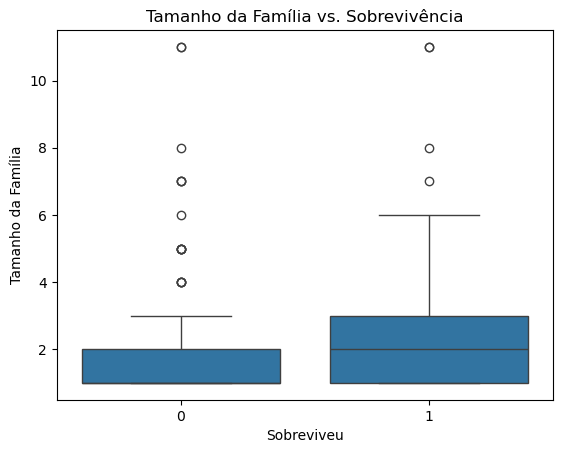

In [37]:
# Boxplot para comparar o tamanho da família entre sobreviventes e não sobreviventes
sns.boxplot(x='sobrevivência', y='tamanho_familia', data=Base_Titanic)
plt.title('Tamanho da Família vs. Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tamanho da Família')
plt.show()


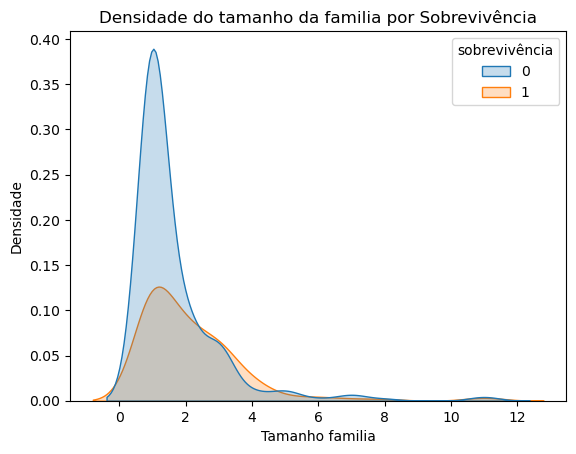

In [38]:
sns.kdeplot(data=Base_Titanic, x='tamanho_familia', hue='sobrevivência', fill=True)
plt.title('Densidade do tamanho da familia por Sobrevivência')
plt.xlabel('Tamanho familia')
plt.ylabel('Densidade')
plt.show()

## **📌 Conclusão do Projeto**

### **🔍Resumo dos Achados**

O projeto `"Explorando o Naufrágio do Titanic: Um Estudo de Ciência / Análise de Dados"` revelou padrões interessantes sobre os fatores que influenciaram a sobrevivência dos passageiros. Algumas das principais descobertas incluem:

**1. Gênero foi um fator determinante**

* Mulheres tiveram uma taxa de sobrevivência significativamente maior do que os homens.

* Isso pode ser atribuído às normas sociais da época e ao protocolo de resgate ("Mulheres e Crianças primeiro").

**Classe social influenciou fortemente a sobrevivência**

* Passageiros da primeira classe tiveram a maior taxa de sobrevivência

* Passageiros da terceira classe enfrentaram as menores chances de resgate, provavelmente devido á sua localização no navio e menor acesso a botes salva vidas.

**Idade desempenhou um papel importante**

* Segundo a análise univaridade, a bordo do navio tinha muitos tripulantes jovens entre 20 a 30 anos.

* Crianças e jovens adultos tiveram maiores taxas de sobrevivência, o que reforça a idade de que foram priorizadas nos resgates.

* Passageiros mais velhos tiveram menor probabilidade de sobreviver.

**A tarifa do bilhete esteve associada à sobrevivência**

* Passageiros que pagaram tarifas mais altas tiveram maior probabilidade de sobreviver, sugerindo que melhores acomodações e proximidade aos pontos de evacuação foram fatores importantes.

**Tamanho da família teve um impacto moderado**

* Passageiros que viajavam sozinhos ou em famílias muito grandes tiveram menor taxa de sobrevivência.

* Famílias pequenas (2-3 pessoas) pareceram ter uma leve vantagem na taxa de sobrevivência.


### **📊 Conclusões Gerais**

Os resultados encontrados reforçam que o desastre do Titanic não foi apenas uma tragédia, mas também um reflexo das desigualdades sociais da época. Pessoas de classe mais alta, mulheres e crianças tiveram mais chance de sobreviver, enquanto homens e passageiros da terceira classe enfrentaram maiores dificuldades.

Além disso, o projeto mostrou a importância das técnicas de pré - processamento e da análise exploratória (EDA) na preparação dos para modelagem preditiva. A transformação dos valores categóricos em numéricos, a criação de novas features (tamanho_familia e deck) e o tratamento de valores nulos, ajudarama a enriquecer a análise e compreender melhor os padrões nos dados.
